In [13]:
import matplotlib.pyplot as plt, json
import seaborn as sns, statistics

In [14]:
# read json
with open('inference_pathology_unet_gpu_vram.json') as f:
    unet_results = json.load(f)
with open('inference_pathology_oct_gpu_vram.json') as f:
    oct_results = json.load(f)

oct_results = {int(k): v for k, v in oct_results.items()}
unet_results = {int(k): v for k, v in unet_results.items()}

In [15]:
oct_results = {k: statistics.mean(v) for k, v in oct_results.items()}
unet_results = {k: statistics.mean(v) for k, v in unet_results.items()}

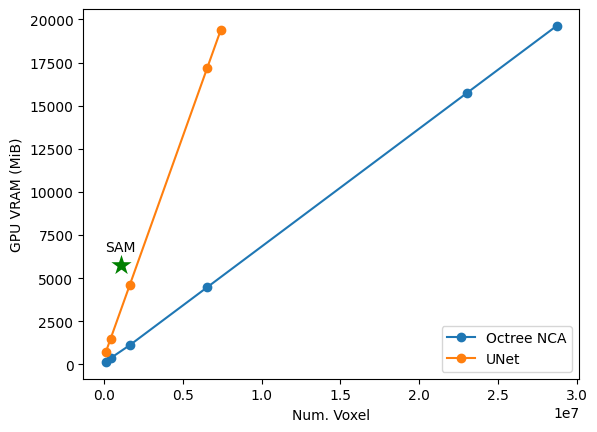

In [16]:
fig, ax = plt.subplots()
plt.plot(oct_results.keys(), oct_results.values(), label='Octree NCA', marker='o')
plt.plot(unet_results.keys(), unet_results.values(), label='UNet', marker='o')
plt.xlabel("Num. Voxel")
plt.ylabel("GPU VRAM (MiB)")
ax.ticklabel_format(useOffset=False)
scatter = ax.scatter(1024**2, 5739.20, color='green', marker='*', s=375, edgecolor='white', linewidth=1.25)
ax.annotate('SAM', (1024**2, 5739.20), textcoords="offset points", xytext=(0,10), ha='center')
plt.legend()